Lesson 08

Author: Rodrigo MM Santiago @rodrigommsantiago

In [ ]:
# Modules
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting

# inline plots
%matplotlib inline 

# Butterworth filter, functions for spectral power
from scipy.signal import welch, spectrogram, butter, filtfilt

import pylab as pl          # animations
from IPython import display # display tools
from time import sleep      # pausing function

No filter is perfect (it atenuates an oscillation, but does not eliminate it)

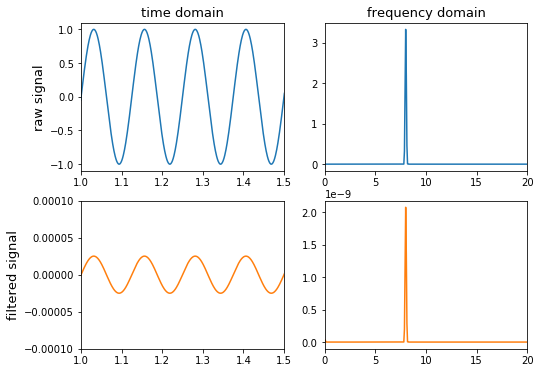

In [ ]:
srate = 1000
dt = 1./srate
t = np.arange(dt,10.0001,dt)

LFP = np.sin(2*np.pi*8*t)

plt.figure(figsize=(8,6))

plt.subplot(221)
plt.plot(t,LFP)
plt.xlim(1,1.5)
plt.ylabel('raw signal',size=13)
plt.title('time domain',size=13)

# Filtering the signal
order = 4 # Filter order
nyq = 0.5*srate # Nyquist frequency
high_freq = 30. # High frequency
highcut = high_freq/nyq # normalizing by Nyquist frequency
# Butterworth filter transference function
b,a = butter(order,highcut,'high')
# Applying the transference function to filter the signal
filtered = filtfilt(b,a,LFP)

plt.subplot(223)
plt.plot(t,filtered,'C1')
plt.xlim(1,1.5)
plt.ylim(-0.0001,0.0001)
plt.ylabel('filtered signal',size=13)

nfft = 2**14
F,Pxx = welch(LFP,srate,nperseg=len(LFP),nfft=nfft)
plt.subplot(222)
plt.plot(F,Pxx)
plt.xlim(0,20)
plt.title('frequency domain',size=13)

F,Pxx = welch(filtered,srate,nperseg=len(LFP),nfft=nfft)
plt.subplot(224)
plt.plot(F,Pxx,'C1')
plt.xlim(0,20);